<a href="https://colab.research.google.com/github/Alireza-Khodapanah/classification-model-based-on-the-Naive-Bayes-method/blob/main/classification%20model%20based%20on%20the%20Naive%20Bayes%20method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_breast_cancer
import numpy as np

data = load_breast_cancer()
X = data.data
y = data.target

print("Missing values in X:", np.any(np.isnan(X)))
print("Missing values in y:", np.any(np.isnan(y)))

Missing values in X: False
Missing values in y: False


### Splitting data

In [ ]:
def train_test_split(X, y, test_size=0.2):
    total_samples = X.shape[0]
    test_samples = int(total_samples * test_size)

    indices = np.random.permutation(total_samples)
    train_indices = indices[:-test_samples]
    test_indices = indices[-test_samples:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y)


print(X_train.shape[0])
print(X_test.shape[0])

456
113


### Calculate mean and variance

In [ ]:
def calculate_class_means(X, y):
    class_labels = np.unique(y)
    means = {}

    for label in class_labels:
        X_class = X[y == label]
        means[label] = [np.sum(X_class[:, i]) / len(X_class) for i in range(X.shape[1])]

    return means

def calculate_class_variances(X, y, means):
    class_labels = np.unique(y)
    variances = {}

    for label in class_labels:
        X_class = X[y == label]
        variances[label] = [
            np.sum((X_class[:, i] - means[label][i]) ** 2) / len(X_class)
            for i in range(X.shape[1])
        ]

    return variances

means = calculate_class_means(X_train, y_train)
variances = calculate_class_variances(X_train, y_train, means)

In [ ]:
for label in means:
        print(f"Class {label}:")
        print(f"  Means: {means[label]}\n")
        print(f"  Variances: {variances[label]}\n\n")


Class 0:
  Means: [17.415290697674422, 21.467558139534884, 114.95093023255815, 973.2162790697676, 0.10231319767441861, 0.14251366279069766, 0.15836441860465114, 0.08647767441860466, 0.1926267441860465, 0.06230872093023256, 0.616392441860465, 1.1956912790697674, 4.345575581395349, 74.22674418604652, 0.006752779069767442, 0.03170774418604651, 0.04173494186046511, 0.015025296511627909, 0.020573075581395348, 0.004039116279069768, 21.133953488372097, 29.041453488372095, 141.13226744186048, 1425.070930232558, 0.14395633720930232, 0.3681081976744186, 0.4492952325581396, 0.1806949418604651, 0.32366453488372093, 0.09118250000000001]

  Variances: [9.960703985262302, 13.345805665224447, 467.31874332071385, 131696.4942698756, 0.00016705639035627365, 0.0030203743499560578, 0.005949100789778257, 0.0012280060318009738, 0.0008143817266089777, 5.7273571619794486e-05, 0.13016430814054897, 0.23465261067975937, 7.176225674520012, 4320.724263818281, 8.961375788399135e-06, 0.0003157066051787452, 0.00046587

### Calculate the covariance matrix


Covariance Matrix:
 [[ 1.23886828e+01  4.79168490e+00  8.52007091e+01  1.21753786e+03
   8.78394942e-03  9.51090429e-02  1.89364021e-01  1.10586914e-01
   1.58567136e-02 -8.16741998e-03  7.00997533e-01 -2.05575160e-01
   5.03033196e+00  1.25768309e+02 -2.31042479e-03  1.33036424e-02
   2.03721668e-02  8.02221826e-03 -2.74212835e-03 -4.19874895e-04
   1.66299373e+01  6.20280834e+00  1.14908732e+02  1.90609143e+03
   9.68110639e-03  2.33940728e-01  3.89757753e-01  1.69922662e-01
   3.96759455e-02  2.09143078e-04]
 [ 4.79168490e+00  1.86709846e+01  3.31785389e+01  4.77191197e+02
  -5.29220373e-03  3.92003751e-02  8.83700208e-02  4.26551332e-02
   4.71766157e-03 -4.30801608e-03  3.19231419e-01  9.51430517e-01
   2.32386155e+00  5.13049505e+01 -1.05992498e-04  1.08868402e-02
   1.46592250e-02  3.52539264e-03  4.03899622e-05  2.21164061e-04
   7.14062288e+00  2.43867320e+01  4.95318607e+01  8.32926781e+02
   2.17512725e-03  1.49332245e-01  2.36493375e-01  7.24422647e-02
   2.25610775e-02  5.

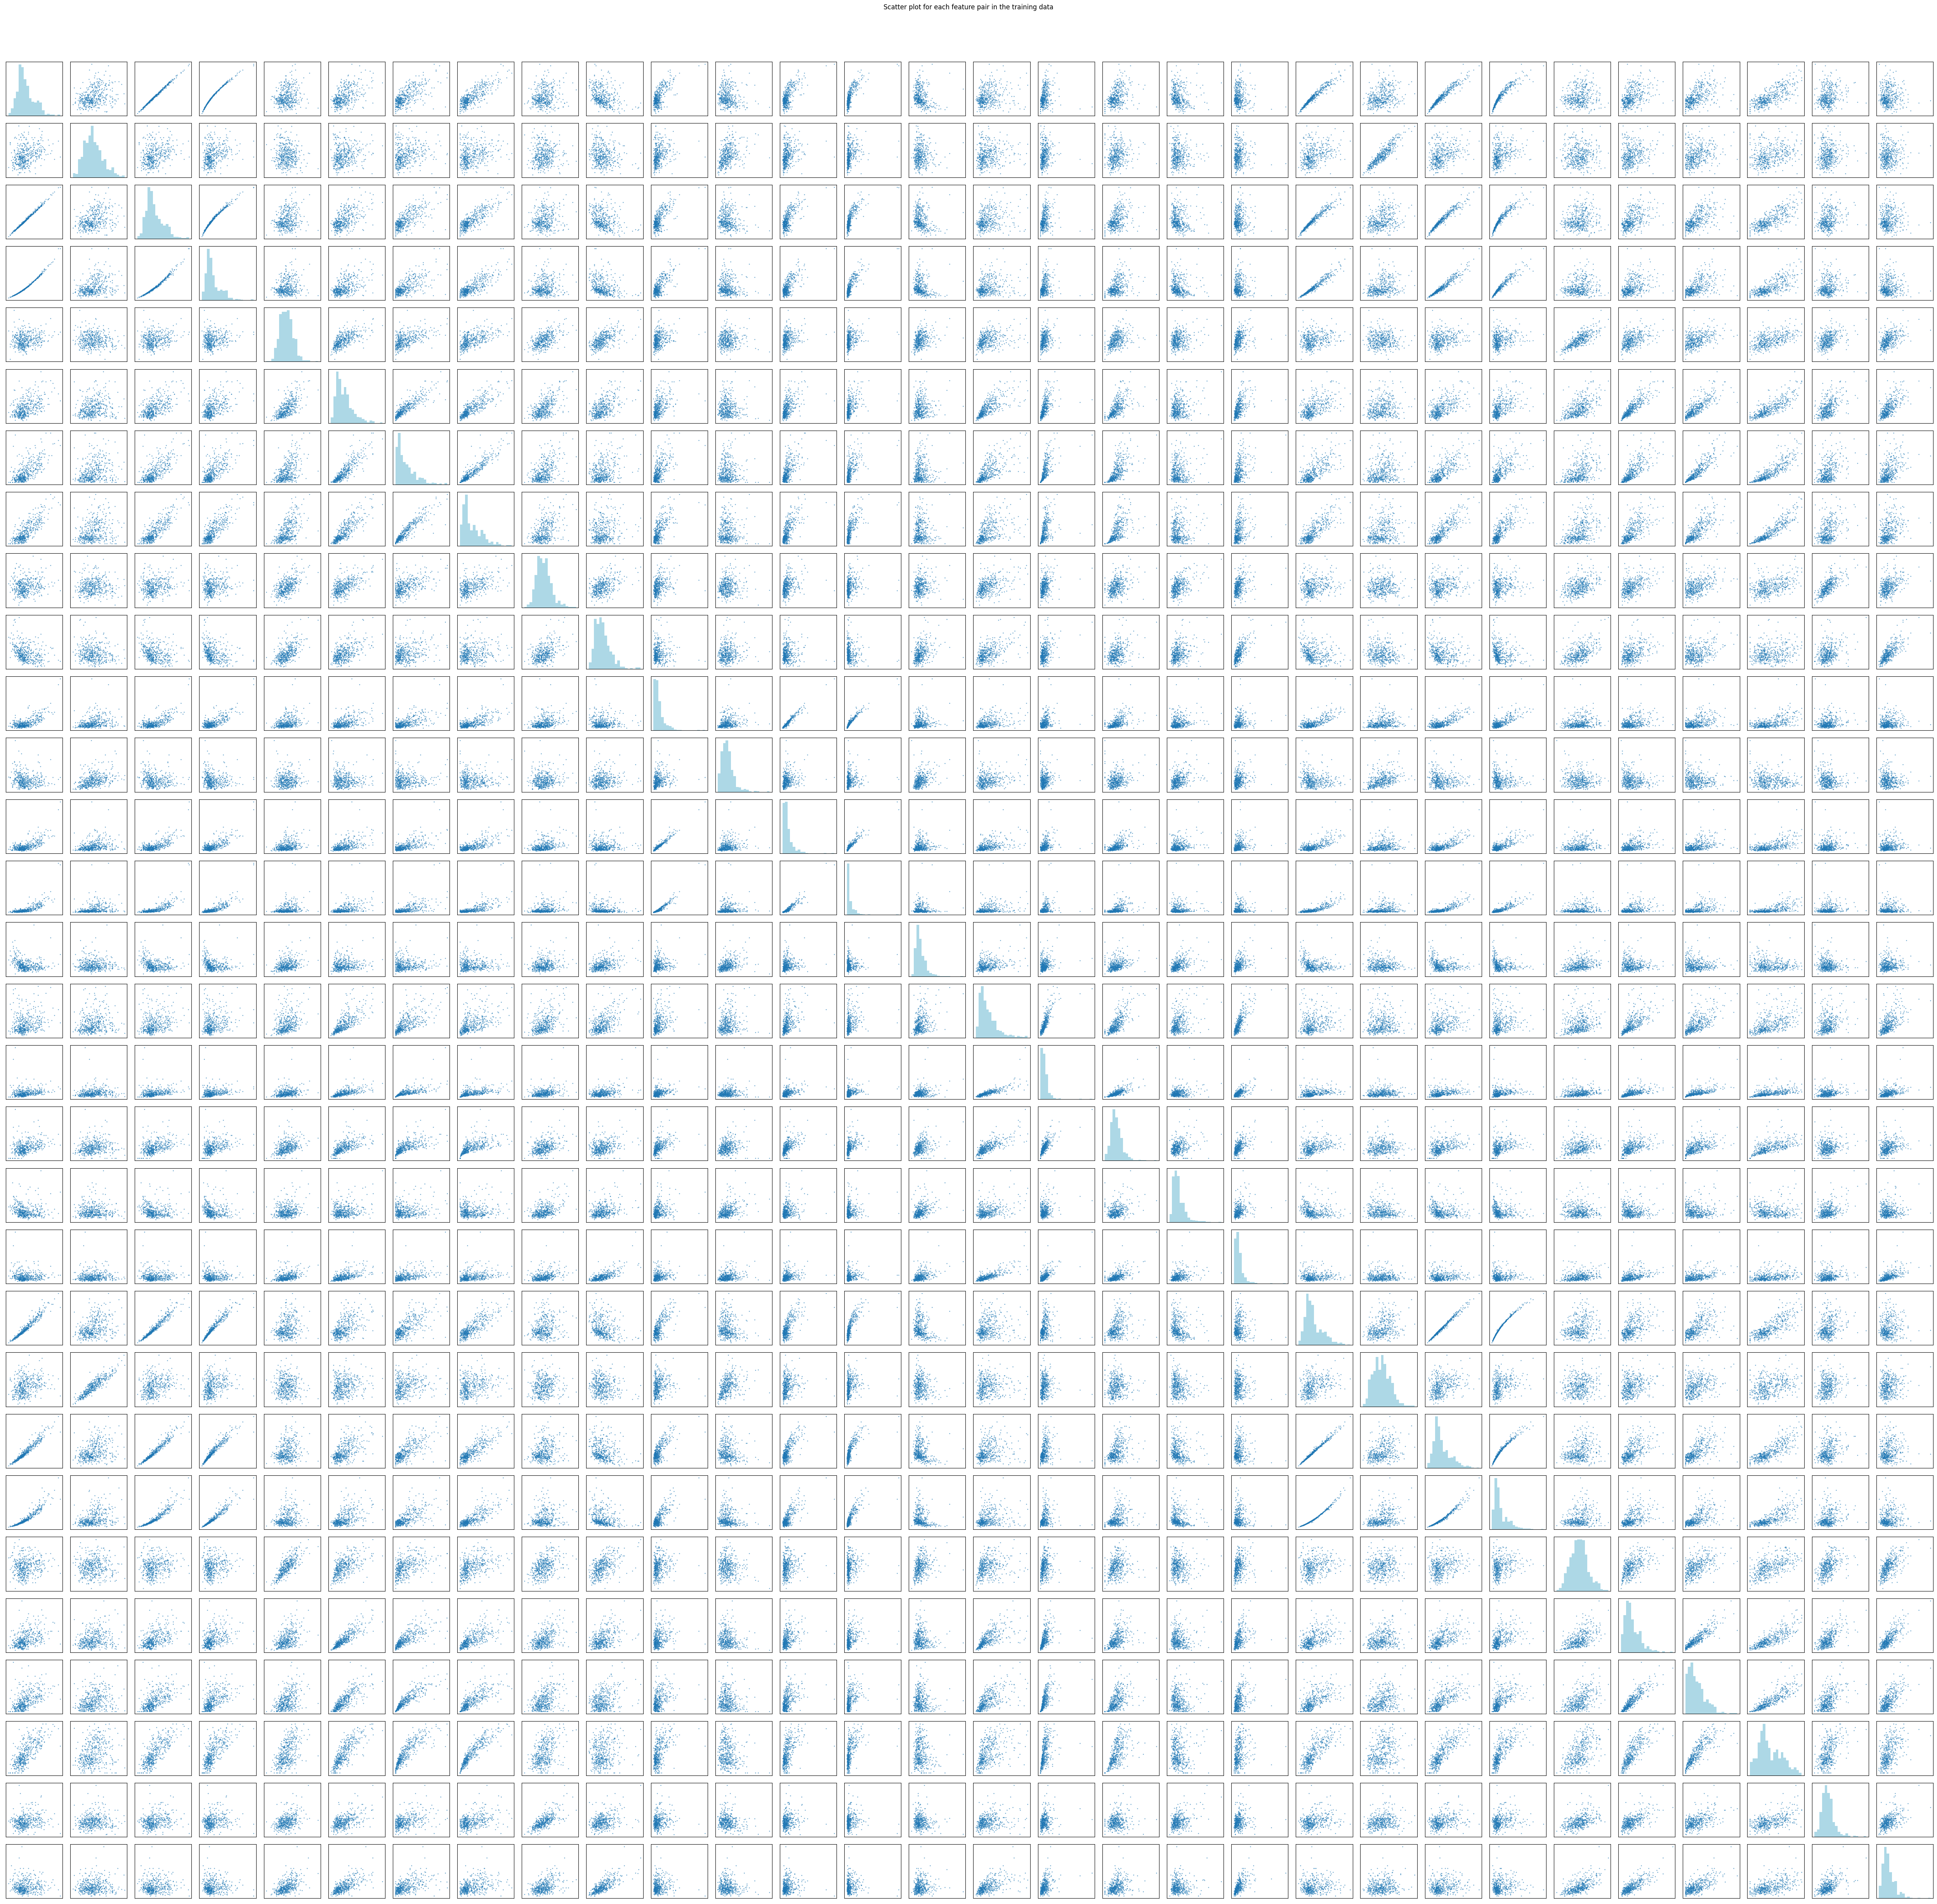

In [ ]:
def calculate_covariance_matrix(X):
    n_samples, n_features = X.shape
    mean_vector = np.mean(X, axis=0)
    covariance_matrix = np.zeros((n_features, n_features))

    for i in range(n_features):
        for j in range(n_features):
            covariance_matrix[i, j] = np.sum((X[:, i] - mean_vector[i])
                                              * (X[:, j] - mean_vector[j]))
                                              / (n_samples - 1)

    return covariance_matrix

covariance_matrix = calculate_covariance_matrix(X_train)


def visualize_covariance_matrix(X):
    n_features = X.shape[1]
    fig, axes = plt.subplots(n_features, n_features, figsize=(50, 50))

    for i in range(n_features):
        for j in range(n_features):
            if i == j:
                axes[i, j].hist(X[:, i], bins=20, color='lightblue')
                axes[i, j].set_yticks([])
            else:
                axes[i, j].scatter(X[:, j], X[:, i], alpha=0.5, s=1)

            axes[i, j].set_xticks([])
            axes[i, j].set_yticks([])

    plt.suptitle('Scatter plot for each feature pair in the training data')
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

print("Covariance Matrix:\n", covariance_matrix)

visualize_covariance_matrix(X_train)

### calculate Pearson correlation and correlation matrix

In [ ]:
%pip install seaborn

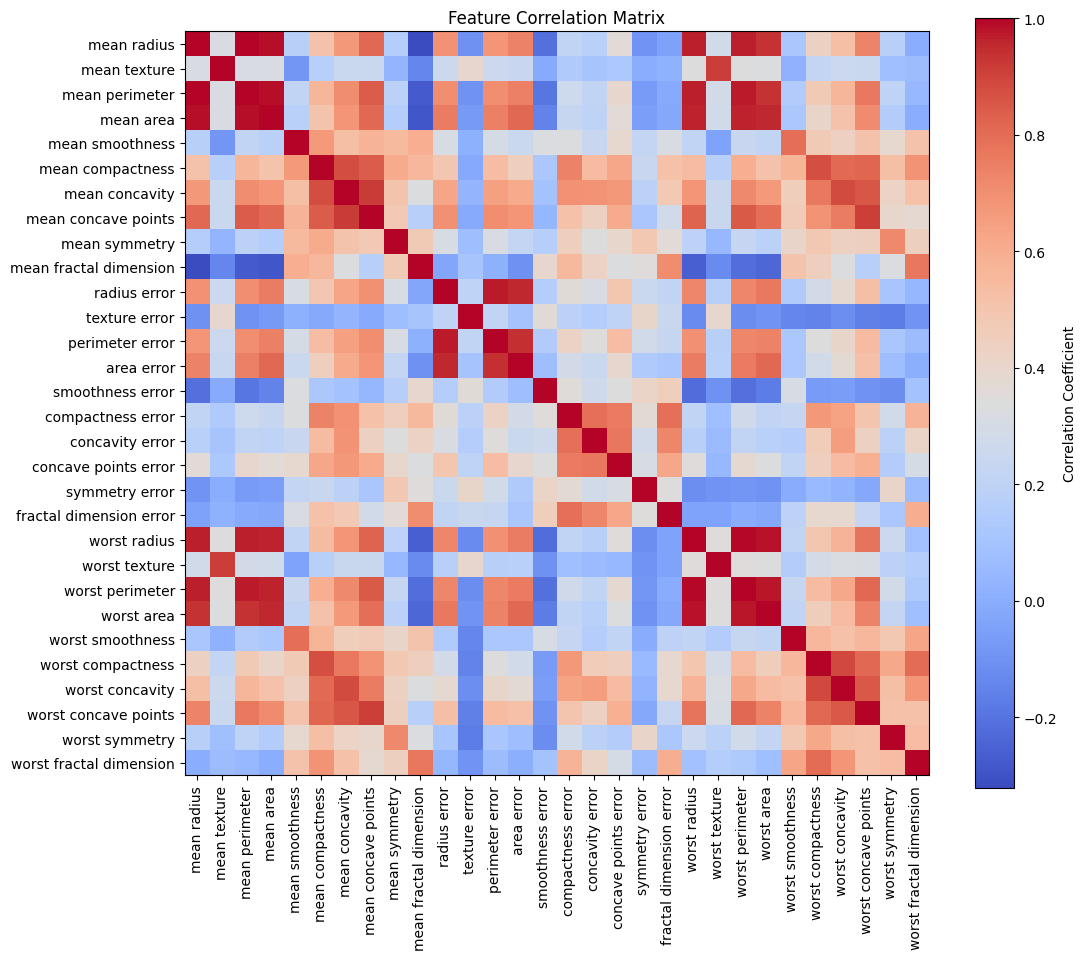

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def calculate_mean(arr):
    return np.sum(arr) / len(arr)

def pearson_correlation(x, y):
    mean_x = calculate_mean(x)
    mean_y = calculate_mean(y)
    numerator = np.sum((x - mean_x) * (y - mean_y))
    denominator = np.sqrt(np.sum((x - mean_x) ** 2) * np.sum((y - mean_y) ** 2))
    return numerator / denominator

def calculate_correlation_matrix(X):
    num_features = X.shape[1]
    correlation_matrix = np.zeros((num_features, num_features))

    for i in range(num_features):
        for j in range(num_features):
            correlation_matrix[i, j] = pearson_correlation(X[:, i], X[:, j])

    return correlation_matrix

correlation_matrix = calculate_correlation_matrix(X_train)

def plot_correlation_matrix(correlation_matrix):
    plt.figure(figsize=(12, 10))
    plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
    plt.colorbar(label='Correlation Coefficient')
    plt.xticks(range(correlation_matrix.shape[1]), data.feature_names, rotation=90)
    plt.yticks(range(correlation_matrix.shape[1]), data.feature_names)
    plt.title("Feature Correlation Matrix")
    plt.show()

plot_correlation_matrix(correlation_matrix)


### Bayesian Decision function

In [ ]:
import math


def gaussian_likelihood(x, mean, var):
    return (1 / math.sqrt(2 * math.pi * var)) * math.exp(-((x - mean) ** 2) / (2 * var))


def bayesian_decision(x, priors, means, variances):
    posteriors = []

    for class_index in priors.keys():
        prior = priors[class_index]
        likelihood = 1
        for i in range(len(x)):
            mean = means[class_index][i]
            var = variances[class_index][i]
            likelihood *= gaussian_likelihood(x[i], mean, var)
        posterior = likelihood * prior
        posteriors.append(posterior)

    return np.argmax(posteriors)


### evaluation

In [ ]:
def calculate_priors(y):
    class_labels, counts = np.unique(y, return_counts=True)
    total_samples = len(y)
    return {label: count / total_samples for label, count in zip(class_labels, counts)}

priors = calculate_priors(y_train)


def evaluate_model(X_test, y_test, priors, means, variances):
    correct_predictions = 0
    for i, x in enumerate(X_test):
        prediction = bayesian_decision(x, priors, means, variances)
        if prediction == y_test[i]:
            correct_predictions += 1
    accuracy = correct_predictions / len(y_test)
    return accuracy

accuracy = evaluate_model(X_test, y_test, priors, means, variances)
print("Model accuracy:", accuracy)

Model accuracy: 0.9646017699115044


### model with different cost ratios

In [ ]:
def define_cost_matrix(error_ratio):
    C_benign_given_malignant = error_ratio
    C_malignant_given_benign = 1

    cost_matrix = {
        0: {0: 0, 1: C_benign_given_malignant},
        1: {0: C_malignant_given_benign, 1: 0}
    }
    return cost_matrix


def bayesian_decision_cost_sensitive(x, priors, means, variances, cost_matrix):
    expected_costs = []

    for class_index in priors.keys():
        total_cost = 0
        for other_class in priors.keys():
            likelihood = 1
            for i in range(len(x)):
                mean = means[other_class][i]
                var = variances[other_class][i]
                likelihood *= gaussian_likelihood(x[i], mean, var)
            posterior = likelihood * priors[other_class]

            total_cost += cost_matrix[class_index][other_class] * posterior
        expected_costs.append(total_cost)

    return np.argmin(expected_costs)


In [ ]:
def evaluate_cost_sensitive_model(X_test, y_test, priors, means, variances, cost_ratio):
    cost_matrix = define_cost_matrix(cost_ratio)
    correct_predictions = 0
    for i, x in enumerate(X_test):
        prediction = bayesian_decision_cost_sensitive(x, priors, means, variances, cost_matrix)
        if prediction == y_test[i]:
            correct_predictions += 1
    accuracy = correct_predictions / len(y_test)
    return accuracy


cost_ratios = [1, 2, 5, 10,50,100]
for ratio in cost_ratios:
    accuracy = evaluate_cost_sensitive_model(X_test, y_test, priors, means, variances, ratio)
    print(f"Model accuracy with cost ratio {ratio}: {accuracy:.4f}")


Model accuracy with cost ratio 1: 0.9646
Model accuracy with cost ratio 2: 0.9646
Model accuracy with cost ratio 5: 0.9735
Model accuracy with cost ratio 10: 0.9735
Model accuracy with cost ratio 50: 0.9735
Model accuracy with cost ratio 100: 0.9823
